## Init notebook

This is run once.

## Preliminaries

In [1]:
import quantus

/home/lweber/work-code/Quantus/quantus/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-25 14:57:06.916133: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 14:57:07.669322: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:


# Import libraries.
from IPython.display import clear_output
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
import torch
import captum
import torchvision
import wandb
import tqdm

from zennit import attribution as zattr
from zennit import image as zimage
from zennit import composites as zcomp

from models import models
from data import dataloaders, datasets, transforms
from attribution import zennit_utils as zutils
from utils import arguments as argument_utils
from main import *

try:
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print('Using device:', torch.cuda.get_device_name(0))
except:
    pass

/home/lweber/work-code/Quantus/quantus/__init__.py
Using device: NVIDIA TITAN RTX


## Plots



Preparing datasets...
DATA_ROOT /media/lweber/f3ed2aae-a7bf-4a55-b50d-ea8fb534f1f51/Datasets/imagenet/val
Number of Samples in Dataset: 1000
Reduced of Samples in Dataset: 100
Preparing dataloaders...


/home/lweber/work-code/Quantus/quantus/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lweber/work-code/Quantus/quantus/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for 

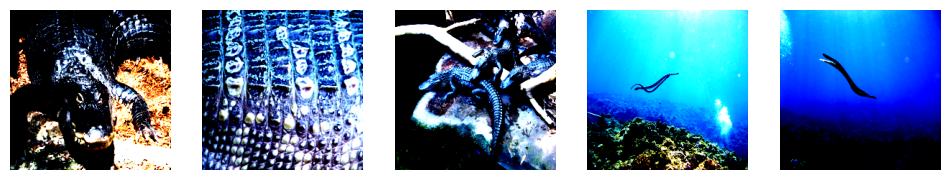

In [3]:
os.environ["WANDB_API_KEY"] = "343d642ebb6021c0303b16436ddf0be59cb0696f"
wandb_projectname = "denoise-sanity-checks"
download_restriction = {}
layer_id = 0

# Get all results from wandb
print("Downloading Results from wandb...")
res = []
api = wandb.Api()
entity, project = "leanderweber", wandb_projectname  # set to your entity and project 
runs = api.runs(entity + "/" + project) 
with tqdm(total=len(runs)) as pbar:
    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        config = {k: v for k,v in run.config.items() if not k.startswith('_')}
        if all([config[s] == v for s, v in download_restriction.items()]):
            history = run.scan_history()
            metric_list = []
            for row in history:
                metric_list.append(row["mean-score"])

            res.append((config, metric_list))

        pbar.update(1)

# Sort Runs
#TODO

# Init Plot
import matplotlib as mpl
import matplotlib.font_manager as font_manager
mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

ax.set_ylabel("SSIM")
ax.set_ylim([0.0, 1.1])
ax.set_yticks([0, 0.5, 1.0])
ax.set_yticklabels([0, 0.5, 1])

ax.set_xlabel("#Noise Draws")
ax.set_xlim([0, 1000])
ax.set_xticks([1, 10, 25, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
ax.set_xticklabels([1, 10, 25, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

alpha = 0.7
std_alpha = 0.3
palette = cm.get_cmap("tab10")(np.linspace(0, 1, 10))
linewidth = 2.5


# ax.plot(x_vals, metric_list_mean, alpha=alpha, linewidth=linewidth, marker=marker, color=color, markevery=5, label=filterstr)
# ax.fill_between(x_vals, metric_list_mean+metric_list_std, metric_list_mean-metric_list_std, facecolor=color, alpha=std_alpha)

# xticklocs = [0] + [5*1875, 10*1875, 15*1875, 20*1875]
# xticklabels = ["0", "5", "10", "15", "20"]

# ax.set_xticks(xticklocs)
# ax.set_xticklabels(xticklabels)
# ax.set_xlabel("Epoch")

# ax.legend()

# fig.subplots_adjust(left=0.2, right=0.95, bottom=0.2, top=0.95, wspace=0, hspace=0)

# savefile = os.path.join(root, "{}-{}.svg".format(metric_to_plot, constraintstr))
# fig.savefig(savefile)
